# **Load & split the dataset into training, validation, and testing subsets:**

In [3]:
from __future__ import print_function
import os
import numpy as np

In [ ]:
from keras.utils import to_categorical
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

batch_size = 128
num_classes = 10
epochs = 20

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Split the dataset into training, validation, and testing subsets
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

img_rows, img_cols, channels = 32, 32, 3

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, channels)
val_images = val_images.reshape(val_images.shape[0], img_rows, img_cols, channels)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, channels)

input_shape = (img_rows, img_cols, channels)
print('Train samples:', train_images.shape[0])
print('Validation samples:', val_images.shape[0])
print('Test samples:', test_images.shape[0])


170498071/170498071 [==============================] - 4s 0us/step
Train samples: 30000
Validation samples: 10000
Test samples: 10000


# **Data Modeling**

In [4]:
train_images = train_images.astype("float32")
val_images = val_images.astype("float32")
test_images = test_images.astype("float32")

mean = np.mean(train_images)
std = np.std(train_images)

train_images = (train_images - mean) / std
val_images = (val_images - mean) / std
test_images = (test_images - mean) / std

train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# **Build the CNN model:**

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [6]:
wd = 1e-4 #weight_decay

In [7]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 10, activation = 'softmax'))


# **Train the model for different learning rates:**

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


In [9]:
lr = 1e-4#learning rate

In [ ]:
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your training data (train_images, train_labels)
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))



Epoch 1/20


313/313 [==============================] - 2s 8ms/step - loss: 0.6862 - accuracy: 0.8346
Test Loss: 0.6862407922744751
Test Accuracy: 0.8345999717712402
313/313 [==============================] - 2s 6ms/step
Confusion Matrix:
[[876   7  26   8  15   3   5  13  35  20]
 [  9 923   2   2   1   4   6   3  20  56]
 [ 52   1 766  29  72  29  49  15   4   5]
 [ 14   2  38 603  50 180  86  27  15   5]
 [  9   0  20  31 829  17  33  28   2   1]
 [  7   1  28 101  41 768  26  28   1   2]
 [  4   1  28  16  15   4 918   1   2   1]
 [  7   1  10  25  47  35   7 847   4   5]
 [ 27  11   5   6   2   0   1   2 899   7]
 [ 17  34   3   6   1   6   6   5  18 917]]
Precision: 0.8341587354123712
Recall: 0.8355937550085347
Accuracy: 0.8346


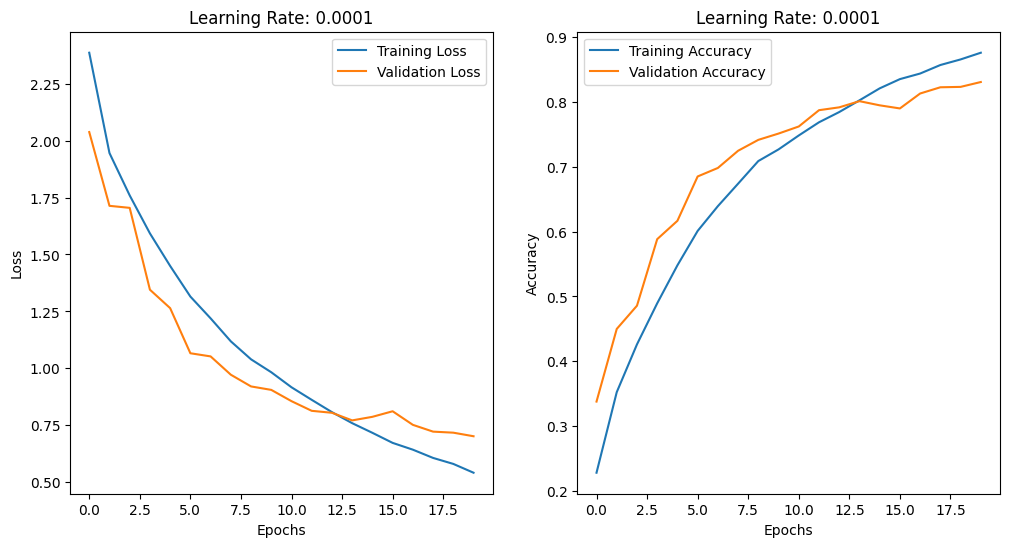

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate test predictions
test_predictions = model.predict(test_images)
test_labels = np.argmax(test_labels, axis=1)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Calculate precision and recall
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

plt.show()


In [ ]:
lr = 1e-3#learning rate

In [ ]:
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your training data (train_images, train_labels)
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
938/938 [==============================] - 34s 32ms/step - loss: 1.4860 - accuracy: 0.6148 - val_loss: 1.2894 - val_accuracy: 0.6946
Epoch 2/20
938/938 [==============================] - 30s 32ms/step - loss: 1.3778 - accuracy: 0.6799 - val_loss: 1.2862 - val_accuracy: 0.7323
Epoch 3/20
938/938 [==============================] - 30s 32ms/step - loss: 1.3894 - accuracy: 0.7139 - val_loss: 1.3582 - val_accuracy: 0.7450
Epoch 4/20
938/938 [==============================] - 30s 32ms/step - loss: 1.4764 - accuracy: 0.7273 - val_loss: 1.4622 - val_accuracy: 0.7374
Epoch 5/20
938/938 [==============================] - 30s 32ms/step - loss: 1.5203 - accuracy: 0.7471 - val_loss: 1.5256 - val_accuracy: 0.7582
Epoch 6/20
938/938 [==============================] - 30s 32ms/step - loss: 1.5761 - accuracy: 0.7528 - val_loss: 1.5933 - val_accuracy: 0.7573
Epoch 7/20
938/938 [==============================] - 30s 32ms/step - loss: 1.6037 - accuracy: 0.7684 - val_loss: 1.6704 - val_accuracy:

313/313 [==============================] - 4s 11ms/step - loss: 3.6574 - accuracy: 0.1008
Test Loss: 3.6573753356933594
Test Accuracy: 0.10080000013113022
313/313 [==============================] - 3s 9ms/step
Confusion Matrix:
[[1008    0    0    0    0    0    0    0    0    0]
 [1026    0    0    0    0    0    0    0    0    0]
 [1022    0    0    0    0    0    0    0    0    0]
 [1020    0    0    0    0    0    0    0    0    0]
 [ 970    0    0    0    0    0    0    0    0    0]
 [1003    0    0    0    0    0    0    0    0    0]
 [ 990    0    0    0    0    0    0    0    0    0]
 [ 988    0    0    0    0    0    0    0    0    0]
 [ 960    0    0    0    0    0    0    0    0    0]
 [1013    0    0    0    0    0    0    0    0    0]]
Precision: 0.01008
Recall: 0.1
Accuracy: 0.1008


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


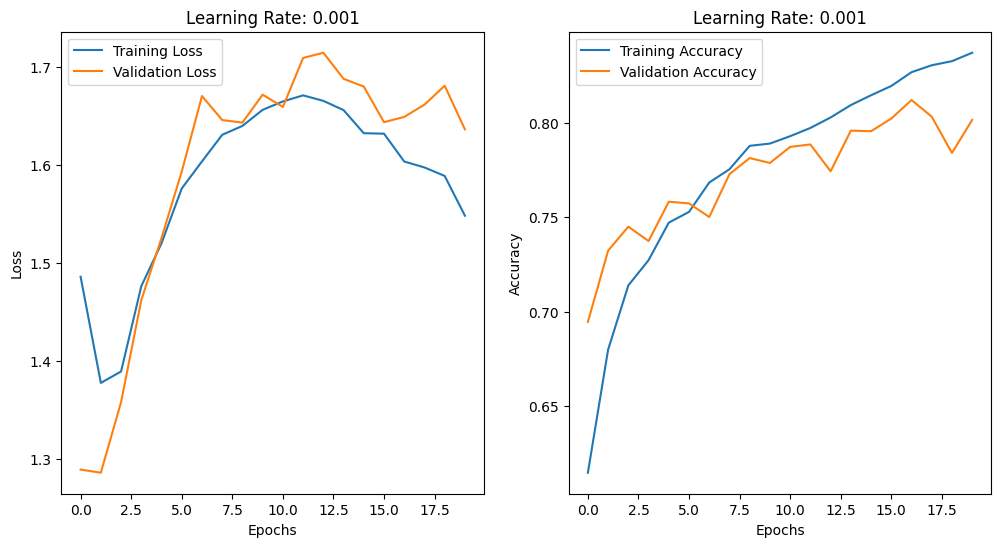

In [ ]:
# Ensure test_images and test_labels are in the correct shape
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, channels)
test_labels = to_categorical(test_labels, num_classes)

# Preprocess the test data (mean subtraction and standardization)
test_images = (test_images - mean) / std

# Verify the number of classes in test_labels
assert test_labels.shape[1] == num_classes, "Number of classes in test_labels should match num_classes."

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


# Generate test predictions
test_predictions = model.predict(test_images)
test_labels = np.argmax(test_labels, axis=1)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Calculate precision and recall
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

plt.show()

In [ ]:
lr = 1e-2#learning rate

In [ ]:
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your training data (train_images, train_labels)
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))



Epoch 1/20
938/938 [==============================] - 33s 31ms/step - loss: 3.0628 - accuracy: 0.1096 - val_loss: 2.3396 - val_accuracy: 0.0950
Epoch 2/20
938/938 [==============================] - 30s 32ms/step - loss: 3.5164 - accuracy: 0.1006 - val_loss: 3.6294 - val_accuracy: 0.1030
Epoch 3/20
938/938 [==============================] - 29s 31ms/step - loss: 2.7550 - accuracy: 0.0992 - val_loss: 2.4265 - val_accuracy: 0.1030
Epoch 4/20
938/938 [==============================] - 29s 31ms/step - loss: 2.3607 - accuracy: 0.1012 - val_loss: 2.3250 - val_accuracy: 0.1085
Epoch 5/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3145 - accuracy: 0.0969 - val_loss: 2.3081 - val_accuracy: 0.1005
Epoch 6/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3057 - accuracy: 0.0994 - val_loss: 2.3052 - val_accuracy: 0.1030
Epoch 7/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3043 - accuracy: 0.0994 - val_loss: 2.3046 - val_accuracy:

313/313 [==============================] - 3s 8ms/step - loss: 2.3038 - accuracy: 0.1013
Test Loss: 2.30383563041687
Test Accuracy: 0.10130000114440918
313/313 [==============================] - 2s 6ms/step
Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0 1008]
 [   0    0    0    0    0    0    0    0    0 1026]
 [   0    0    0    0    0    0    0    0    0 1022]
 [   0    0    0    0    0    0    0    0    0 1020]
 [   0    0    0    0    0    0    0    0    0  970]
 [   0    0    0    0    0    0    0    0    0 1003]
 [   0    0    0    0    0    0    0    0    0  990]
 [   0    0    0    0    0    0    0    0    0  988]
 [   0    0    0    0    0    0    0    0    0  960]
 [   0    0    0    0    0    0    0    0    0 1013]]
Precision: 0.01013
Recall: 0.1
Accuracy: 0.1013


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


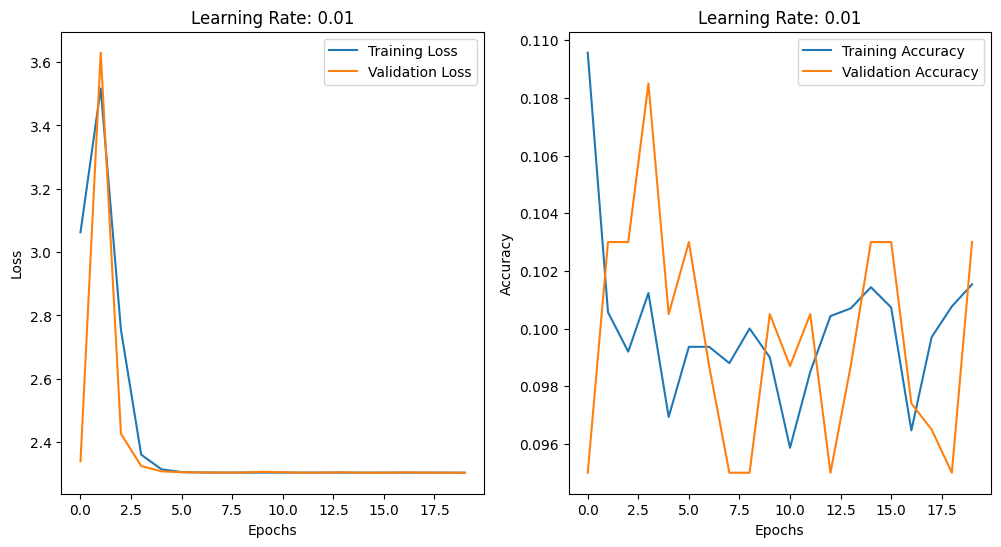

In [ ]:
# Ensure test_images and test_labels are in the correct shape
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, channels)
test_labels = to_categorical(test_labels, num_classes)

# Preprocess the test data (mean subtraction and standardization)
test_images = (test_images - mean) / std

# Verify the number of classes in test_labels
assert test_labels.shape[1] == num_classes, "Number of classes in test_labels should match num_classes."

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


# Generate test predictions
test_predictions = model.predict(test_images)
test_labels = np.argmax(test_labels, axis=1)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Calculate precision and recall
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

plt.show()

In [ ]:
lr = 1e-1#learning rate

In [ ]:
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your training data (train_images, train_labels)
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
938/938 [==============================] - 36s 33ms/step - loss: 2.3146 - accuracy: 0.1013 - val_loss: 2.3184 - val_accuracy: 0.1021
Epoch 2/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3153 - accuracy: 0.1001 - val_loss: 2.3124 - val_accuracy: 0.1030
Epoch 3/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3147 - accuracy: 0.0992 - val_loss: 2.3176 - val_accuracy: 0.0974
Epoch 4/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3156 - accuracy: 0.0999 - val_loss: 2.3167 - val_accuracy: 0.0953
Epoch 5/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3146 - accuracy: 0.0995 - val_loss: 2.3296 - val_accuracy: 0.0987
Epoch 6/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3163 - accuracy: 0.0993 - val_loss: 2.3207 - val_accuracy: 0.0965
Epoch 7/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3154 - accuracy: 0.1011 - val_loss: 2.3191 - val_accuracy:

313/313 [==============================] - 3s 9ms/step - loss: 2.3179 - accuracy: 0.0960
Test Loss: 2.317936420440674
Test Accuracy: 0.09600000083446503
313/313 [==============================] - 2s 6ms/step
Confusion Matrix:
[[   0    0    0    0    0    0    0    0 1008    0]
 [   0    0    0    0    0    0    0    0 1026    0]
 [   0    0    0    0    0    0    0    0 1022    0]
 [   0    0    0    0    0    0    0    0 1020    0]
 [   0    0    0    0    0    0    0    0  970    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0  990    0]
 [   0    0    0    0    0    0    0    0  988    0]
 [   0    0    0    0    0    0    0    0  960    0]
 [   0    0    0    0    0    0    0    0 1013    0]]
Precision: 0.009600000000000001
Recall: 0.1
Accuracy: 0.096


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


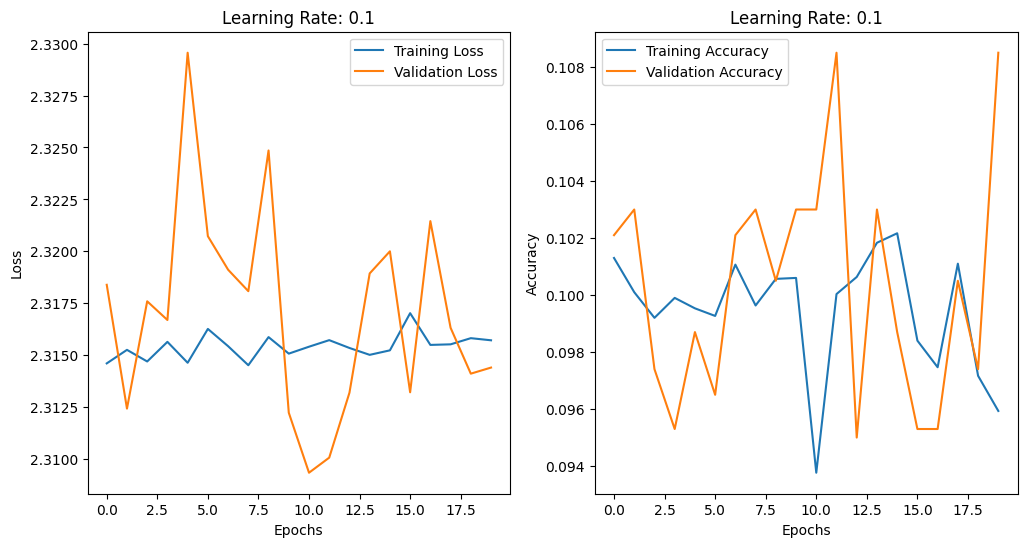

In [ ]:
# Ensure test_images and test_labels are in the correct shape
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, channels)
test_labels = to_categorical(test_labels, num_classes)

# Preprocess the test data (mean subtraction and standardization)
test_images = (test_images - mean) / std

# Verify the number of classes in test_labels
assert test_labels.shape[1] == num_classes, "Number of classes in test_labels should match num_classes."

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


# Generate test predictions
test_predictions = model.predict(test_images)
test_labels = np.argmax(test_labels, axis=1)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Calculate precision and recall
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

plt.show()

# **Comparing the Efficacy of Custom CNN Models and Fine-Tuned Pre-trained Models for CIFAR-10 Classification.**

In [ ]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam

# Load the ResNet-50 model pre-trained on ImageNet, excluding the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers for CIFAR-10 classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model by combining the base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model and train only the custom layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the fine-tuned model using the same training and validation data splits
history_fine_tuned = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
938/938 [==============================] - 20s 17ms/step - loss: 1.9329 - accuracy: 0.3067 - val_loss: 1.7506 - val_accuracy: 0.3648
Epoch 2/20
938/938 [==============================] - 14s 15ms/step - loss: 1.7901 - accuracy: 0.3553 - val_loss: 1.7017 - val_accuracy: 0.3839
Epoch 3/20
938/938 [==============================] - 16s 17ms/step - loss: 1.7482 - accuracy: 0.3721 - val_loss: 1.6330 - val_accuracy: 0.4152
Epoch 4/20
938/938 [==============================] - 15s 16ms/step - loss: 1.7230 - accuracy: 0.3840 - val_loss: 1.6326 - val_accuracy: 0.4221
Epoch 5/20
938/938 [==============================] - 16s 17ms/step - loss: 1.6970 - accuracy: 0.3938 - val_loss: 1.6194 - val_accuracy: 0.4167
Epoch 6/20
938/938 [==============================] - 15s 16ms/step - loss: 1.6698 - accuracy: 0.4066 - val_loss: 1.6079 - val_accuracy: 0.4216
Epoch 7/20
938/938 [==============================] - 17s 18ms/step - loss: 1.6586 - accuracy: 0.4090 - val_loss: 1.5974 - val_accuracy:

In [ ]:
# Evaluate the fine-tuned model on the test data
test_loss_ft, test_accuracy_ft = model.evaluate(test_images, test_labels)
print(f'Fine-tuned Model Test Loss: {test_loss_ft}')
print(f'Fine-tuned Model Test Accuracy: {test_accuracy_ft}')

# Compare the test accuracy of the custom CNN model with the fine-tuned ResNet-50 model
print(f'Custom CNN Model Test Accuracy: {test_accuracy}')
print(f'Fine-tuned ResNet-50 Model Test Accuracy: {test_accuracy_ft}')


# Plot the training and validation loss for your custom CNN model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Custom CNN Training Loss')
plt.plot(history.history['val_loss'], label='Custom CNN Validation Loss')
plt.plot(history_fine_tuned.history['loss'], label='Fine-tuned ResNet-50 Training Loss')
plt.plot(history_fine_tuned.history['val_loss'], label='Fine-tuned ResNet-50 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

# Plot the training and validation accuracy for your custom CNN model
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Custom CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Custom CNN Validation Accuracy')
plt.plot(history_fine_tuned.history['accuracy'], label='Fine-tuned ResNet-50 Training Accuracy')
plt.plot(history_fine_tuned.history['val_accuracy'], label='Fine-tuned ResNet-50 Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()
